#               Project – Document Classification (P114)

# Problem Statements:
**Today the major problem being faced across the industry is how to acquire the right talent, using minimal resources  over the internet and in minimal time. As described there are  three major challenges that are required to   be overcome, to bring efficiencies to the complete process.**

•-> Separating the right candidates from the pack

•-> Making sense of candidate CVs

•-> Knowing that candidates can do the job before you hire them

# Business objective- 

## The document classification solution should significantly reduce the manual human effort in the HRM and financial department. It should achieve a higher level of accuracy and automation with minimal human intervention


## Sample Data Set Details: Resumes and financial documents

#  Import Necessary Libreries

In [1]:
#!pip install scikit-learn
#!pip install -U spacy
#!python -m spacy download en
#python -m spacy download en_core_web_trf
#!pip install pyresparser
#!python -m  nltk.downloader words
#!pip install nltk
#!python -m spacy download en_core_web_sm
#!pip install docx2txt
#!pip install spacy
#!pip install textract
#!pip install antiword
#!pip install PyPDF2
import warnings
warnings.filterwarnings("ignore")
import spacy
import pickle
import random
import docs
from spacy import displacy
import docx
import spacy
from spacy import schemas
from spacy import Dict
from spacy import displacy
from spacy.lang.en.stop_words import  STOP_WORDS
import string
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
import doc
import textract
import antiword
from PyPDF2 import PdfFileReader
import re
import re
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')
#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
from spacy.matcher import Matcher
#nltk.download('stopwords')
#nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [3]:
nlp = spacy.load("en_core_web_trf")

In [4]:
#nltk.download('omw-1.4')

# Import Dataset

## 1. Reading Document Files

In [5]:
file=docx.Document(docx='./train_data/Gopi Krishna_Hexaware.docx')

In [6]:
def readtxt(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

print (readtxt('./train_data/Gopi Krishna_Hexaware.docx'))

	


Name         : Gopi Krishna Reddy
		                       

PROFESSIONAL SUMMERY:
Working as a Workday Consultant with 3+ years as Workday Consultant and good experience on Report Writing, Integration of HCM. 

Knowledge of the software development life cycle from design through scoping, requirements gathering, analysis, development, testing, user acceptance, deployment, maintenance/support and change management. 
Good working knowledge on Inbound and Outbound EIB Integration concepts and created various EIB Integrations.
Building Core Connector integrations for extracting worker, position, status, leave and absence delta changes.
Designed and built all types of integrations using Document Transformation, EIB, PICOF, Cloud Connectors and Custom Report Writer. 
Having  good knowledge on Workday Studio 
Experience with XML, XPATH and XSLT and Expert in designing/development of Interfaces with legacy and third party systems. 
Hands-on experience In Migrating the XSLT Code, Reports fr

## 2.Reading Pdf Files

In [7]:
def extract_information(pdf_path):
    with open(pdf_path, 'rb') as f:
        pdf = PdfFileReader(f)
        information = pdf.getDocumentInfo()
        number_of_pages = pdf.getNumPages()

    txt = f"""
    Information about {pdf_path}: 

    Author: {information.author}
    Creator: {information.creator}
    Producer: {information.producer}
    Subject: {information.subject}
    Title: {information.title}
    Number of pages: {number_of_pages}
    """

    print(txt)
    return information

if __name__ == '__main__':
    path = 'reportlab-sample.pdf'
    extract_information("./train_data/Reactjs Developer_Prabakaran_Musquare Technologies.pdf")


    Information about ./train_data/Reactjs Developer_Prabakaran_Musquare Technologies.pdf: 

    Author: None
    Creator: Microsoft® Word for Microsoft 365
    Producer: Microsoft® Word for Microsoft 365
    Subject: None
    Title: None
    Number of pages: 2
    


In [8]:
import textract
PDF_read = textract.process('./train_data/Reactjs Developer_Prabakaran_Musquare Technologies.pdf')

In [9]:
print(PDF_read.strip().decode())

Name: M. Prabakaran
Title: UI Developer
PROFESSIONAL SUMMARY

●

2.4+ years of Professional IT experience as a software developer having knowledge on different UI based
Application.

●

Hands on experience in HTML, CSS, JS, ReactJS.

●

Hands on experience in handling UI interaction, Design methodology.

●

Handling In-App purchase, uploading and maintaining apps in play store.

●

Hands on experience with customization over base-product depends on client requirement.

●

Cohesive team worker, having strong analytical, problem solving and interpersonal skills.

EDUCATION
●

Completed on 2017 Bachelor of Technology (ECE), PRIST University, Tamil Nadu.

●

Completed on 2012 Higher Secondary, Mount Park Hr Sec School, Thiyagadurgam, Tamil Nadu.

●

Completed on 2010 SSLC, Krishnasamy Hr Sec School, Cuddalore, Tamil Nadu.

SKILLS

Operating System
Programming Languages
Mobile App Development
Designing
Architectural Pattern
IDE
Services

Windows, Unix,Mac
HTML, CSS, JS, React
Windows and An

## 3. Importing Multiple Files

In [10]:
import glob

In [11]:
path='./train_data/'
all_files=glob.glob(path + "/*.docx")
all_files

['./train_data\\Anil kumar.docx',
 './train_data\\AradhanaTripathi[4_0].docx',
 './train_data\\Buddha Vamsi.docx',
 './train_data\\ChinnaSubbarayuduM_Hexaware.docx',
 './train_data\\Gopi Krishna_Hexaware.docx',
 './train_data\\Hari Krishna M_Hexaware.docx',
 './train_data\\Harikrishna Akula_Hexaware.docx',
 './train_data\\Hima Mendu_Hexaware.docx',
 './train_data\\Himaja G_(Hexaware).docx',
 './train_data\\Internship_Ravali_Musquare Technologies (1).docx',
 './train_data\\Internship_Susovan Bag_Musquare Technologies.docx',
 './train_data\\J. Sumanth Royal_Hexaware.docx',
 './train_data\\Jyotiverma_Heaware.docx',
 './train_data\\kamballapradeep.docx',
 './train_data\\MooraboyinaGuravaiah_Hexaware.docx',
 './train_data\\Naresh Babu Cherukuri_Hexaware.docx',
 './train_data\\Nazeer Basha.docx',
 './train_data\\Neeraj Mishra.docx',
 './train_data\\P V Sai Krishna_ Hexaware.docx',
 './train_data\\Peoplesoft Admin_AnubhavSingh.docx',
 './train_data\\Peoplesoft Admin_G Ananda Rayudu.docx',
 '.

In [12]:
li=[]
for filename in all_files:
    dummy_1=readtxt(filename)
    li.append(dummy_1)
    

In [13]:
print(li)

['ANIL KUMAR MADDUKURI  \t\t\nSQL & MSBI Developer   \n\n\t\n\nSummary\n\n2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.\nExpertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.\nHandled data manipulation and data consistency by creating Views, Triggers, and Synonyms.\nHands on experience in creation, optimization and debugging Stored Procedure and Functions.\nFamiliar in writing queries using CTE, Temporary Tables and Table Variables.\nGood experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.\nExperience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.\nWorked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.\nUsed containers such as for each loop 

In [14]:
cv_1=""
for page in li:
  cv_1= cv_1 + str(page)

print(cv_1.strip())

# we have extracted the data  and stored in _cv variable

ANIL KUMAR MADDUKURI  		
SQL & MSBI Developer   

	

Summary

2.4 years of experience in MS SQL Server (SSMS) and creating SSIS packages, SSRS Reports by using Microsoft Business Intelligence (MSBI) tools.
Expertise in various types of Joins and Sub Queries for writing complex queries involving multiple tables.
Handled data manipulation and data consistency by creating Views, Triggers, and Synonyms.
Hands on experience in creation, optimization and debugging Stored Procedure and Functions.
Familiar in writing queries using CTE, Temporary Tables and Table Variables.
Good experience in using Set Operators like Union, Union All, Except and Intersect to assist required data.
Experience in manipulate the data from multiple table and report to the client using Aggregate Functions, Windows Functions and String Functions.
Worked extensively on Data Extraction, Transformation and Loading (ETL) process in SQL Server Integration Services.
Used containers such as for each loop container and sequen

In [15]:
all_files

['./train_data\\Anil kumar.docx',
 './train_data\\AradhanaTripathi[4_0].docx',
 './train_data\\Buddha Vamsi.docx',
 './train_data\\ChinnaSubbarayuduM_Hexaware.docx',
 './train_data\\Gopi Krishna_Hexaware.docx',
 './train_data\\Hari Krishna M_Hexaware.docx',
 './train_data\\Harikrishna Akula_Hexaware.docx',
 './train_data\\Hima Mendu_Hexaware.docx',
 './train_data\\Himaja G_(Hexaware).docx',
 './train_data\\Internship_Ravali_Musquare Technologies (1).docx',
 './train_data\\Internship_Susovan Bag_Musquare Technologies.docx',
 './train_data\\J. Sumanth Royal_Hexaware.docx',
 './train_data\\Jyotiverma_Heaware.docx',
 './train_data\\kamballapradeep.docx',
 './train_data\\MooraboyinaGuravaiah_Hexaware.docx',
 './train_data\\Naresh Babu Cherukuri_Hexaware.docx',
 './train_data\\Nazeer Basha.docx',
 './train_data\\Neeraj Mishra.docx',
 './train_data\\P V Sai Krishna_ Hexaware.docx',
 './train_data\\Peoplesoft Admin_AnubhavSingh.docx',
 './train_data\\Peoplesoft Admin_G Ananda Rayudu.docx',
 '.

## Creating a Dataframe with the Files

In [16]:
import pandas as pd

In [17]:
dataframe=pd.DataFrame()

In [18]:
for files in all_files:
    #print(files)
    dataframe["resume"]=li

In [19]:
dataframe

,resume
0,ANIL KUMAR MADDUKURI \t\t\nSQL & MSBI Develop...
1,\nAradhana Tripathi\n\nCurrent Location: Gachi...
2,BUDDHA VAMSI ...
3,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...
4,\t\n\n\nName : Gopi Krishna Reddy\n\t\...
...,...
73,Career objective\n\t\nA rewarding opportunity ...
74,Career objective\n\t\nA rewarding opportunity ...
75,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...
76,...


# Exploratory Data Analysis(EDA):



## Text PreProcessing

### List of Stop words

In [20]:
stopwords=list(STOP_WORDS)
stopwords

['across',
 'thru',
 'wherever',
 'whoever',
 'afterwards',
 'his',
 'various',
 'done',
 'where',
 'last',
 'namely',
 'others',
 'side',
 'whether',
 'anything',
 'somewhere',
 'between',
 'per',
 'most',
 'cannot',
 'be',
 'thence',
 'move',
 'almost',
 'this',
 'before',
 'ca',
 'n‘t',
 'could',
 'besides',
 'whence',
 'then',
 'eleven',
 'becomes',
 'until',
 'both',
 'being',
 'my',
 'formerly',
 'everywhere',
 'two',
 'unless',
 "'ll",
 'always',
 'same',
 'through',
 'mostly',
 'anyway',
 'say',
 'name',
 'as',
 'became',
 'about',
 'in',
 'anyhow',
 'see',
 'ever',
 'again',
 'behind',
 'hereupon',
 'herein',
 'nevertheless',
 'every',
 'against',
 'is',
 'everyone',
 'whole',
 'that',
 'within',
 'else',
 'six',
 'whereby',
 'bottom',
 'least',
 'none',
 'after',
 'moreover',
 'meanwhile',
 'so',
 'therein',
 'an',
 'wherein',
 'seem',
 '’ve',
 'how',
 'show',
 'into',
 'along',
 'below',
 "n't",
 'amount',
 'what',
 'or',
 'make',
 'sometimes',
 'whereas',
 'of',
 'above',
 

### Punctuations

In [21]:
punct = string.punctuation

In [22]:
print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## Cleaning Resume Text
**We are going to use nltk library to clean our dataset in a few steps:**

->We are going to use regex to remove hyperlinks, special characters, or punctuations.

->Lowering text

->Splitting text into array based on space

->Lemmatizing text to its base form for normalizations

->Removing English stopwords

->Appending the results into an array

##  Segmentation and Lemmatisation and Normalisation

## Create a Function

In [23]:
clean = []
lz = WordNetLemmatizer()
for i in range(dataframe.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        dataframe["resume"].iloc[i],
    )
    review = re.sub(r"[0-9]+", " ", review) # Remove Numbers
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [ lz.lemmatize(word) for word in review if word not in STOP_WORDS]
    review = " ".join(review)
    clean.append(review)

In [24]:
dataframe["Clean_Resume"] = clean

In [25]:
dataframe

,resume,Clean_Resume
0,ANIL KUMAR MADDUKURI \t\t\nSQL & MSBI Develop...,anil kumar maddukuri sql msbi developer summar...
1,\nAradhana Tripathi\n\nCurrent Location: Gachi...,aradhana tripathi current location gachibowli ...
2,BUDDHA VAMSI ...,buddha vamsi career objective year experience ...
3,Chinna Subbarayudu M\nDOB: 06th March 1994\nNa...,chinna subbarayudu m dob th march nationality ...
4,\t\n\n\nName : Gopi Krishna Reddy\n\t\...,gopi krishna reddy professional summery workin...
...,...,...
73,Career objective\n\t\nA rewarding opportunity ...,career objective rewarding opportunity growth ...
74,Career objective\n\t\nA rewarding opportunity ...,career objective rewarding opportunity growth ...
75,Venkateswarlu.B\t\t\t\t\t\t\t\tWorkday Consult...,venkateswarlu b workday consultant having year...
76,...,vinay kumar v workday functional consultant ex...


# Data Preparation

In [26]:
dataframe["Clean_Resume"][0]

'anil kumar maddukuri sql msbi developer summary year experience m sql server ssms creating ssis package ssrs report microsoft business intelligence msbi tool expertise type join sub query writing complex query involving multiple table handled data manipulation data consistency creating view trigger synonym hand experience creation optimization debugging stored procedure function familiar writing query cte temporary table table variable good experience set operator like union union intersect assist required data experience manipulate data multiple table report client aggregate function window function string function worked extensively data extraction transformation loading etl process sql server integration service container loop container sequence container load data multiple source file database table expertise task like data flow task execute sql task control flow task execute package task execute process task bulk insert task sends mail task ftp task script task control flow level

## Let's  Perform NER (Name Entity Recognition)  Using Inbuilt Function of Spacy

### Spacy Libreries

In [27]:
nlp = spacy.load("en_core_web_trf")

In [28]:
text=nlp(dataframe["Clean_Resume"][1])

In [29]:
displacy.render(text, style = "ent")

### Entities with Tag 

In [30]:
for ent in text.ents:
  print(f'{ent.label_.upper():{20}} - {ent.text}')

PERSON               - aradhana tripathi
GPE                  - gachibowli
GPE                  - hyderabad
ORG                  - ak university


# Feature Extraction

In [31]:
skill_set=["SQL"," C","TSQL", "Python","MariaDB","MSExcel", "Tableau" , "EIB"
           ,"Oracle","PeopleSoft","AWSRedshift","FCM","MSBI",
           "HTML" , "JavaScript", "React","JAVA"]  #"XML""XSLT"

In [32]:
for i in range(len(skill_set)):
    skill_set[i] = skill_set[i].lower()
print(skill_set)

['sql', ' c', 'tsql', 'python', 'mariadb', 'msexcel', 'tableau', 'eib', 'oracle', 'peoplesoft', 'awsredshift', 'fcm', 'msbi', 'html', 'javascript', 'react', 'java']


## Skill Set Extraction 

In [33]:
# load pre-trained model
#nlp = spacy.load('en_core_web_trf')
#noun_chunks = nlp.noun_chunks
resume = text 
noun_chunks = resume.noun_chunks
def extract_skills(resume_text):
    nlp_text = nlp(resume_text)

    # removing stop words and implementing word tokenization
    tokens = [token.text for token in nlp_text if not token.is_stop]
    
    
     
    
    
    skills = skill_set
    
    skillset = []
    
    # check for one-grams
    for token in tokens:
        if token in skills:
            skillset.append(token)
    
    # check for bi-grams and tri-grams
    for token in noun_chunks:
        token = token.text.lower().strip()
        if token in skills:
            skillset.append(token)
    
    return [i.capitalize() for i in set([i.lower() for i in skillset])]

In [34]:
extract_skills(text)

['Python', 'Mariadb', 'Sql', 'Tableau']

In [35]:
for i in range(dataframe.shape[0]):
    resume =nlp(dataframe["Clean_Resume"][i]) 
    noun_chunks = resume.noun_chunks
    def extract_skills(resume_text):
        nlp_text = nlp(resume_text)

    # removing stop words and implementing word tokenization
        tokens = [token.text for token in nlp_text if not token.is_stop]
    
    
     
    
    # extract values
        skills = skill_set
    
        skillset = []
    
    # check for one-grams
        for token in tokens:
            if token in skills:
                skillset.append(token)
    
    # check for bi-grams and tri-grams
        for token in noun_chunks:
            token = token.text.lower().strip()
            if token in skills:
                skillset.append(token)
    
        return [i.capitalize() for i in set([i.lower() for i in skillset])]
    

In [36]:
df=pd.DataFrame()

In [37]:
df["Skill"]=dataframe["Clean_Resume"].apply(extract_skills)

In [38]:
df.tail(40)

,Skill
38,[Sql]
39,[Sql]
40,[Sql]
41,[Eib]
42,"[Eib, Peoplesoft]"
43,[Sql]
44,"[Python, Sql]"
45,"[Msbi, Sql]"
46,"[Eib, Sql, Peoplesoft]"
47,"[Javascript, Html, React]"


In [39]:
dataframe["Clean_Resume"][51]

'pragnya pattnaik expertise having year experience ui development html cs javascript bootstrap react j good knowledge java script jquery ajax react j typescript angular working agile methodolgy flexible environment honest believe hard work good communication analytical skill maintain focus high quality deliverable working pressure production environment management ticketing system production environment resolution ticket different priority appropriate solution excellent interpersonal communicator focused building strong client customer relationship proven ability work efficiently independent team work environment ability work optimally scheduled deadline deliver high quality output technical skill educational profile mca ignou indira gandhi national open university odisha working profile working web developer smart edge india pvt ltd november till date professional experience project project description golden amoon resort hotel provides service hotel booking spa conventional centre co

## Extracting one Skill keyword 

In [40]:
for i in range(dataframe.shape[0]):
    resume =nlp(dataframe["Clean_Resume"][i]) 
    noun_chunks = resume.noun_chunks
    def extract_skills_1(resume_text):
        nlp_text = nlp(resume_text)

    # removing stop words and implementing word tokenization
        tokens = [token.text for token in nlp_text if not token.is_stop]
    
    
     
    
    # extract values
        skills = skill_set
    
        skillset = []
        string =""
        
    
    # check for one-grams
        for token in tokens:
            if token in skills:
                skillset.append(token)
                
        string=string+str(skillset.pop())
    # check for bi-grams and tri-grams
        #for token in noun_chunks:
            #token = token.text.lower()
            #if token in skills:
                #skillset.append(token)
                #string=string+str(skillset.pop())
    
        return  string
    

In [41]:
df["Skill_one"]=dataframe["Clean_Resume"].apply(extract_skills_1)

In [42]:
df

,Skill,Skill_one
0,"[Msbi, Sql]",sql
1,"[Python, Mariadb, Sql, Tableau]",sql
2,"[Sql, Oracle]",sql
3,"[Eib, Sql, Peoplesoft, Oracle]",peoplesoft
4,[Eib],eib
...,...,...
73,[Sql],sql
74,[Sql],sql
75,[Eib],eib
76,"[Eib, Peoplesoft]",peoplesoft


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Skill      78 non-null     object
 1   Skill_one  78 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


## Name Extraction

In [44]:
matcher = Matcher(nlp.vocab)

In [45]:
def extract_name(resume_text):
    nlp_text = nlp(resume_text)
    
    # First name and Last name are always Proper Nouns
    pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    
    matcher.add('NAME', [pattern])
    
    matches = matcher(nlp_text)
    
    for match_id, start, end in matches:
        span = nlp_text[start:end]
        return span.text
print('Name: ',extract_name(text).capitalize())

Name:  Aradhana tripathi


In [46]:
for i in range(dataframe.shape[0]):
    
    def extract_name(resume_text):
        nlp_text = nlp(resume_text)
    
    # First name and Last name are always Proper Nouns
        pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]
    
        matcher.add('NAME', [pattern])
    
        matches = matcher(nlp_text)
    
        for match_id, start, end in matches:
            span = nlp_text[start:end]
            return span.text.capitalize()
#print('Name: ',extract_name(text).capitalize())
    

In [47]:
df["Name"]=dataframe["Clean_Resume"].apply(extract_name)

In [48]:
df.head(40)

,Skill,Skill_one,Name
0,"[Msbi, Sql]",sql,Anil kumar
1,"[Python, Mariadb, Sql, Tableau]",sql,Aradhana tripathi
2,"[Sql, Oracle]",sql,Buddha vamsi
3,"[Eib, Sql, Peoplesoft, Oracle]",peoplesoft,Chinna subbarayudu
4,[Eib],eib,Gopi krishna
5,"[Eib, Peoplesoft, Oracle]",oracle,Hari krishna
6,"[Eib, Sql, Peoplesoft, Oracle]",sql,Harikrishna akula
7,[Eib],eib,Hima mendu
8,"[Eib, Html]",eib,G himaja
9,[Java],java,Ravali p


## SkillSet Categories:

In [49]:
#plt.style.use('ggplot')

In [50]:
print ("Displaying the distinct categories of resume -")
print (df['Skill_one'].unique())

Displaying the distinct categories of resume -
['sql' 'peoplesoft' 'eib' 'oracle' 'java' 'javascript' 'html' 'react']


In [51]:
print ("Displaying the distinct categories of resume and the number of records belonging to each category -")
print (df['Skill_one'].value_counts())

Displaying the distinct categories of resume and the number of records belonging to each category -
peoplesoft    21
sql           18
eib           10
html           8
react          7
javascript     6
oracle         5
java           3
Name: Skill_one, dtype: int64


## Bar Plot

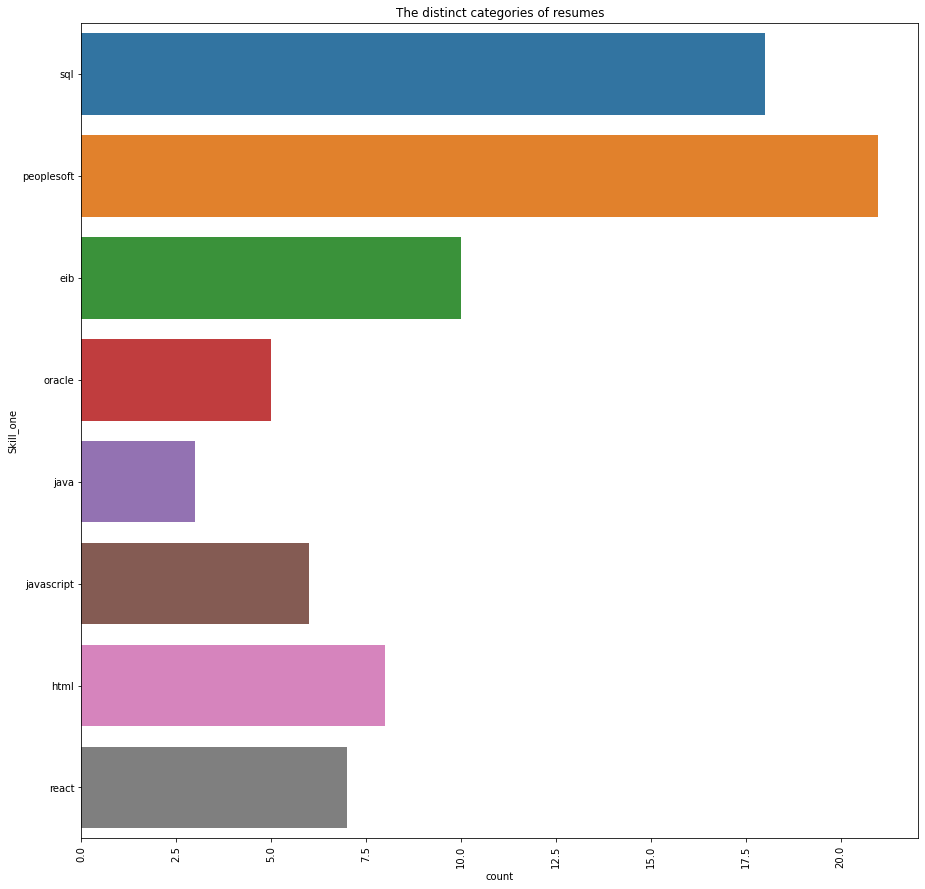

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.title("The distinct categories of resumes")
plt.xticks(rotation=90)
sns.countplot(y="Skill_one", data=df)
plt.show()

In [53]:
import numpy as np

## Pie Plot

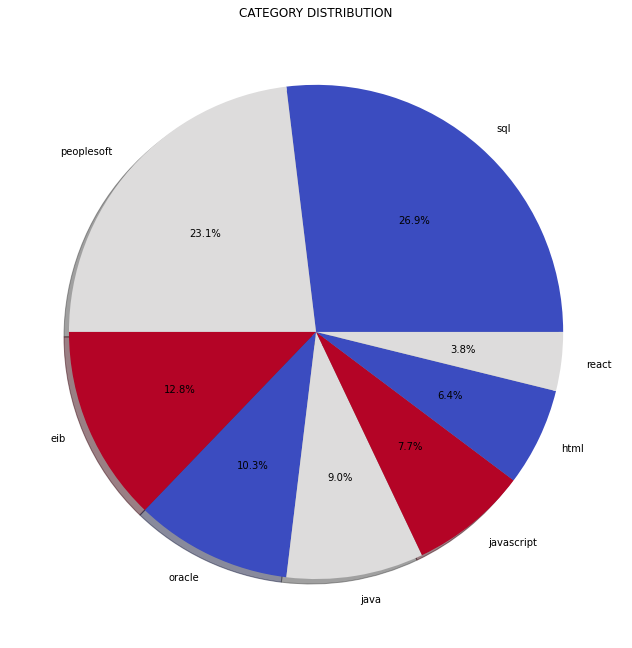

In [54]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Skill_one'].value_counts()
targetLabels  = df['Skill_one'].unique()
# Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')
colors = [cmap(i) for i in np.linspace(0, 1, 3)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

## Creating A Word Cloud

In [55]:
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub(r"[0-9]+", " ", resumeText)
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

[('experience', 594), ('server', 521), ('application', 492), ('report', 450), ('peoplesoft', 421), ('workday', 353), ('integration', 334), ('project', 326), ('data', 310), ('process', 293), ('database', 280), ('business', 256), ('sql', 240), ('system', 227), ('web', 216), ('knowledge', 210), ('worked', 193), ('environment', 190), ('client', 187), ('requirement', 186), ('tool', 184), ('involved', 184), ('role', 171), ('good', 169), ('like', 164), ('user', 160), ('domain', 160), ('support', 157), ('team', 157), ('service', 156), ('skill', 156), ('development', 156), ('creating', 155), ('hcm', 153), ('working', 147), ('change', 141), ('technology', 140), ('people', 140), ('issue', 138), ('technical', 137), ('design', 134), ('testing', 133), ('react', 128), ('responsibility', 127), ('oracle', 127), ('scheduler', 127), ('created', 123), ('production', 123), ('developer', 122), ('security', 121)]


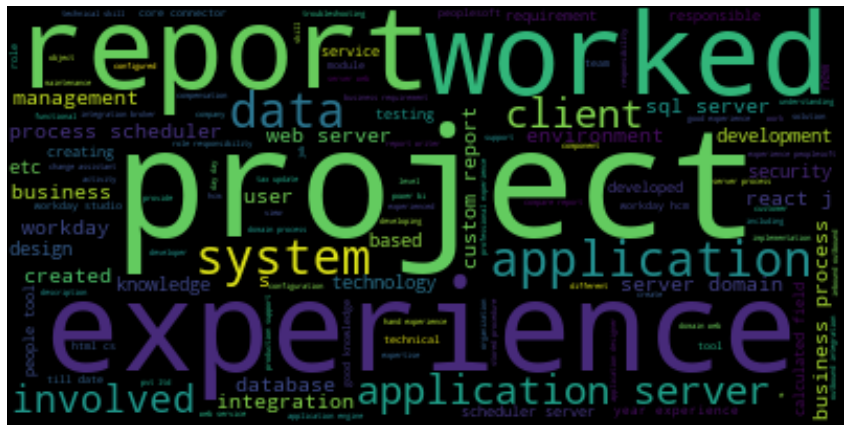

In [56]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = dataframe["Clean_Resume"]
cleanedSentences = ""
for i in range(len(dataframe["resume"])):
    cleanedText = cleanResume(Sentences[i])
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most Frequent words

In [57]:
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('experience', 594), ('server', 521), ('application', 492), ('report', 450), ('peoplesoft', 421), ('workday', 353), ('integration', 334), ('project', 326), ('data', 310), ('process', 293), ('database', 280), ('business', 256), ('sql', 240), ('system', 227), ('web', 216), ('knowledge', 210), ('worked', 193), ('environment', 190), ('client', 187), ('requirement', 186), ('tool', 184), ('involved', 184), ('role', 171), ('good', 169), ('like', 164), ('user', 160), ('domain', 160), ('support', 157), ('team', 157), ('service', 156), ('skill', 156), ('development', 156), ('creating', 155), ('hcm', 153), ('working', 147), ('change', 141), ('technology', 140), ('people', 140), ('issue', 138), ('technical', 137), ('design', 134), ('testing', 133), ('react', 128), ('responsibility', 127), ('oracle', 127), ('scheduler', 127), ('created', 123), ('production', 123), ('developer', 122), ('security', 121)]


In [58]:
from collections import Counter

In [59]:
import seaborn as sns

## Bar plot of Most Frequent Words

In [60]:
def wordBarGraphFunction(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    plt.barh(range(20), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])],color=None)
    plt.yticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]))
    plt.title(title)
    plt.show()

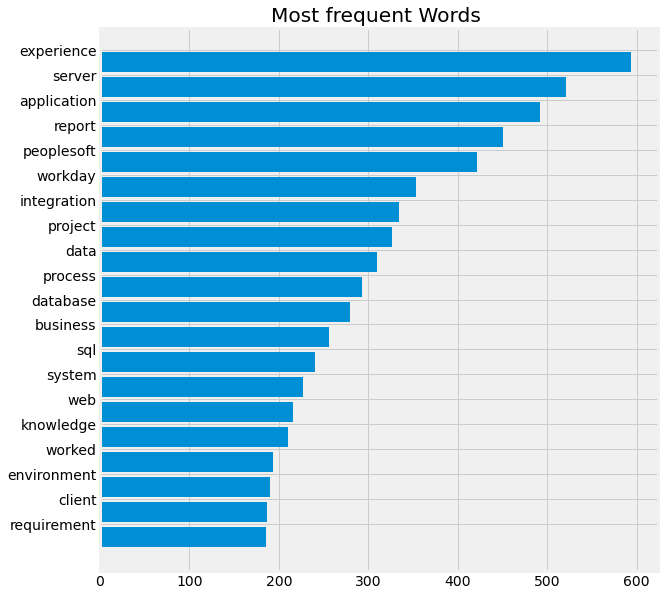

In [61]:
plt.figure(figsize=(10,10))
wordBarGraphFunction(dataframe,"Clean_Resume","Most frequent Words ")

In [133]:
def wordBarGraphFunction_1(df,column,title):
    topic_words = [ z.lower() for y in
                       [ x.split() for x in df[column] if isinstance(x, str)]
                       for z in y]
    word_count_dict = dict(Counter(topic_words))
    popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
    popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
    plt.style.use('fivethirtyeight')
    sns.barplot(x=np.arange(20),y= [word_count_dict[w] for w in reversed(popular_words_nonstop[0:20])])
    plt.xticks([x + 0.5 for x in range(20)], reversed(popular_words_nonstop[0:20]),rotation=90)
    plt.title(title)
    plt.show()

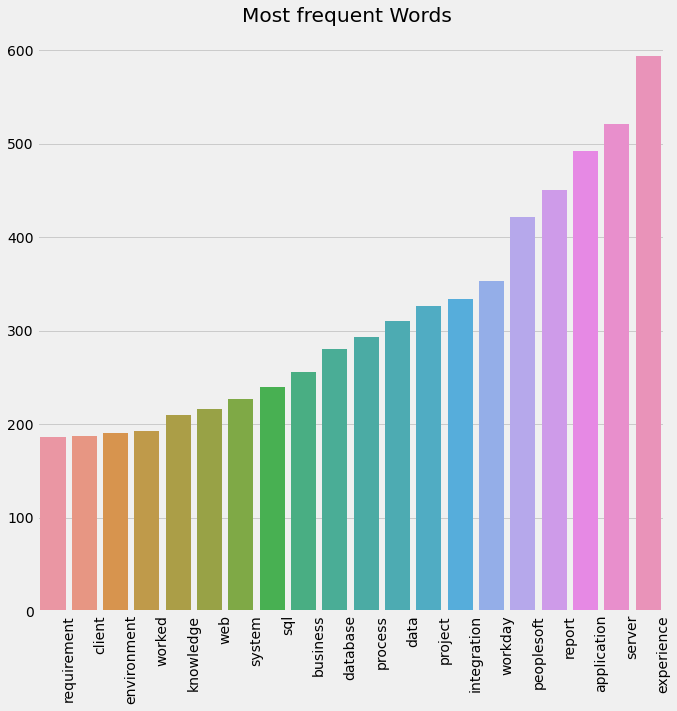

In [134]:
plt.figure(figsize=(10,10))
wordBarGraphFunction_1(dataframe,"Clean_Resume","Most frequent Words ")

In [62]:
['using','Workday','Experience','PeopleSoft',
 'experience','SQL','Application','data','Server',
 'business','Project','reports','like','HCM','Worked',
 'knowledge','Involved','various','Good', 'Reports','React','EIB','integrations','Web','system','creating','issues',
 'Created', 'Responsibilities','Process','process','support', 
 'application','new','People','I','team','working', 
 'Database','database','Integration','Domains','client', 
 'requirements','Core',  'Business', 
'Oracle','Report', 'Developer', 'Data']

['using',
 'Workday',
 'Experience',
 'PeopleSoft',
 'experience',
 'SQL',
 'Application',
 'data',
 'Server',
 'business',
 'Project',
 'reports',
 'like',
 'HCM',
 'Worked',
 'knowledge',
 'Involved',
 'various',
 'Good',
 'Reports',
 'React',
 'EIB',
 'integrations',
 'Web',
 'system',
 'creating',
 'issues',
 'Created',
 'Responsibilities',
 'Process',
 'process',
 'support',
 'application',
 'new',
 'People',
 'I',
 'team',
 'working',
 'Database',
 'database',
 'Integration',
 'Domains',
 'client',
 'requirements',
 'Core',
 'Business',
 'Oracle',
 'Report',
 'Developer',
 'Data']

## Term frequencies in Resume Data

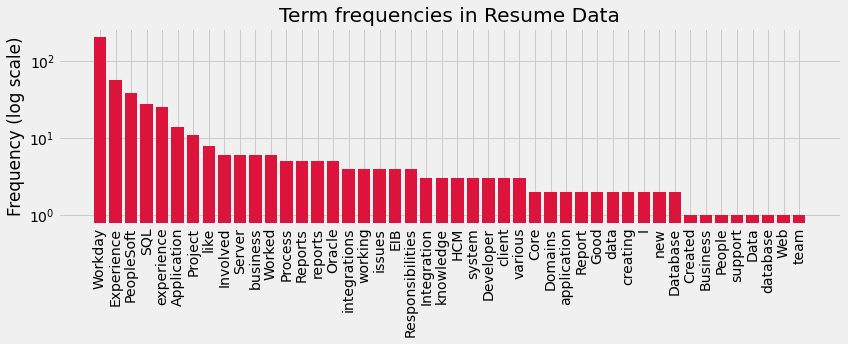

In [63]:
words =['using','Workday','Experience','PeopleSoft',
 'experience','SQL','Application','data','Server',
 'business','Project','reports','like','HCM','Worked',
 'knowledge','Involved','various','Good', 'Reports','React','EIB','integrations','Web','system','creating','issues',
 'Created', 'Responsibilities','Process','process','support', 
 'application','new','People','I','team','working', 
 'Database','database','Integration','Domains','client', 
 'requirements','Core',  'Business', 
'Oracle','Report', 'Developer', 'Data']
indices = np.random.zipf(1.6, size=500).astype(np.int) % len(words)
tw = np.array(words)[indices]

tf = Counter(tw)

y = [count for tag, count in tf.most_common(50)]
x = [tag for tag, count in tf.most_common(50)]
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
plt.bar(x, y, color='crimson')
plt.title("Term frequencies in Resume Data")
plt.ylabel("Frequency (log scale)")
plt.yscale('log') # optionally set a log scale for the y-axis
plt.xticks(rotation=90)
#for i, (tag, count) in enumerate(tf.most_common(50)):
    #plt.text(i, count, f' {count} ', rotation=90,
             #ha='center', va='top' if i < 10 else 'bottom', color='white' if i < 10 else 'black')
#plt.xlim(-0.6, len(x)-0.4) # optionally set tighter x lims
plt.tight_layout() # change the whitespace such that all labels fit nicely
plt.show()

In [64]:
resume_data=pd.DataFrame()

In [65]:
resume_data["Resume"]=dataframe["Clean_Resume"]
resume_data["category"]=df["Skill_one"]

In [66]:
resume_data.head(10)

,Resume,category
0,anil kumar maddukuri sql msbi developer summar...,sql
1,aradhana tripathi current location gachibowli ...,sql
2,buddha vamsi career objective year experience ...,sql
3,chinna subbarayudu m dob th march nationality ...,peoplesoft
4,gopi krishna reddy professional summery workin...,eib
5,hari krishna m summary result oriented profess...,oracle
6,harikrishna akula summary year experience year...,sql
7,hima mendu career objective continue growing k...,eib
8,g himaja career objective work achieving great...,eib
9,ravali p curriculum vitae specialization compu...,java


## Labelling

In [67]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()

In [68]:
resume_data["Encoded_Skill"]=le_encoder.fit_transform(resume_data["category"])

In [69]:
resume_data.head(10)

,Resume,category,Encoded_Skill
0,anil kumar maddukuri sql msbi developer summar...,sql,7
1,aradhana tripathi current location gachibowli ...,sql,7
2,buddha vamsi career objective year experience ...,sql,7
3,chinna subbarayudu m dob th march nationality ...,peoplesoft,5
4,gopi krishna reddy professional summery workin...,eib,0
5,hari krishna m summary result oriented profess...,oracle,4
6,harikrishna akula summary year experience year...,sql,7
7,hima mendu career objective continue growing k...,eib,0
8,g himaja career objective work achieving great...,eib,0
9,ravali p curriculum vitae specialization compu...,java,2


## Vectorization

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [71]:
requiredText = resume_data["Resume"].values
requiredTarget = resume_data["Encoded_Skill"].values

'''
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features=2000)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

char_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='char',
    stop_words='english',
    ngram_range=(2, 6),
    max_features=2000)
char_vectorizer.fit(requiredText)
CharFeatures = char_vectorizer.transform(requiredText)
totalFeatures = hstack([WordFeatures, CharFeatures])
'''
word_vectorizer = TfidfVectorizer(smooth_idf=True,
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,stratify=requiredTarget,random_state=42, test_size=0.1)
print(X_train.shape)
print(X_test.shape)
#
#min_df=3,  max_features=None, 
            #strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            #ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            #stop_words = 'english'
#ctv = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            #ngram_range=(1, 3), stop_words = 'english')


Feature completed .....
(70, 1500)
(8, 1500)


In [72]:
X_train.shape,y_train.shape

((70, 1500), (70,))

In [73]:
X_test.shape,y_test.shape

((8, 1500), (8,))

In [74]:
print("X_train:\n",X_train)
print("---------------------------------------------")
print("X_test:\n",X_test)

X_train:
   (0, 1498)	0.027288879672497043
  (0, 1497)	0.11215249427848548
  (0, 1496)	0.08836658809718455
  (0, 1493)	0.08643936372435752
  (0, 1489)	0.07601858089772992
  (0, 1483)	0.01855689915380085
  (0, 1482)	0.03879025242820387
  (0, 1481)	0.08140570042636663
  (0, 1480)	0.05194986205664672
  (0, 1479)	0.1310155068941255
  (0, 1478)	0.035386291140464494
  (0, 1477)	0.09509505175830013
  (0, 1472)	0.04814710313902011
  (0, 1464)	0.02301560014353181
  (0, 1443)	0.07092904906955813
  (0, 1430)	0.030616599746018255
  (0, 1425)	0.059497847839022545
  (0, 1422)	0.056499301884917814
  (0, 1418)	0.06386300253556895
  (0, 1416)	0.04189183898714641
  (0, 1414)	0.06567760653202197
  (0, 1412)	0.028436454722794536
  (0, 1406)	0.03788467986315752
  (0, 1405)	0.03212389568790072
  (0, 1401)	0.035457074058052304
  :	:
  (69, 244)	0.033931791772570205
  (69, 232)	0.037137257233454624
  (69, 228)	0.08728311287870644
  (69, 227)	0.12053564167142622
  (69, 224)	0.026864456243987662
  (69, 209)	0.0

# Model Building  || Model Training

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,roc_auc_score,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import plotly as py
from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)
import plotly.graph_objs as go

## 1. Logistic Regression

In [154]:
lr = LogisticRegression(solver='saga',class_weight ='balanced')
lr.fit(X_train, y_train)
lr_prediction = lr.predict(X_test)
lr_score = lr.score(X_test,y_test)
print("Logistic Regression Train Accuracy: {}%".format(round(lr.score(X_train,y_train)*100,2)))
print("Logistic Regression Test Accuracy: {}%".format(round(lr.score(X_test,y_test)*100,2)))
lr_cm = confusion_matrix(y_test, lr_prediction)
print("Classification Report:\n")
print(classification_report(y_test, lr_prediction))

Logistic Regression Train Accuracy: 90.0%
Logistic Regression Test Accuracy: 62.5%
Classification Report:

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       0.00      0.00      0.00         1
           3       0.50      1.00      0.67         1
           5       0.50      0.50      0.50         2
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.62         8
   macro avg       0.58      0.67      0.58         8
weighted avg       0.62      0.62      0.58         8



##  2. K-NEAREST NEIGHBOUR (KNN) CLASSIFICATION MODEL

In [164]:
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=1, weights='uniform',p=2,metric='minkowski',algorithm='brute'))
knn.fit(X_train, y_train)
knn_prediction = knn.predict(X_test)
knn_score = knn.score(X_test, y_test)
print("KNN Classification Train Accuracy: {}%".format(round(knn.score(X_train,y_train)*100,2)))
print("KNN Classification Test Accuracy: {}%".format(round(knn.score(X_test,y_test)*100,2)))
knn_cm = confusion_matrix(y_test, knn_prediction)

print('Classification Report:\n')

print(classification_report(y_test, knn_prediction))

KNN Classification Train Accuracy: 100.0%
KNN Classification Test Accuracy: 75.0%
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       0.50      0.50      0.50         2

    accuracy                           0.75         8
   macro avg       0.69      0.75      0.72         8
weighted avg       0.67      0.75      0.70         8



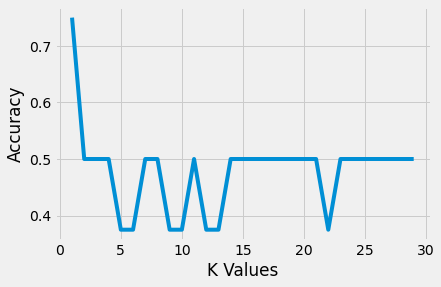

In [162]:
#Find Best K Value

score_list = []
for each in range(1,30):
    knn2 =OneVsRestClassifier(KNeighborsClassifier(n_neighbors=each, weights='uniform',p=2,metric='minkowski',algorithm='brute'))
    knn2.fit(X_train, y_train)
    score_list.append(knn2.score(X_test, y_test))
plt.plot(range(1,30), score_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.show()

## 3. SUPPORT VECTOR MACHINE (SVM) CLASSIFICATION MODEL

In [102]:
svm = OneVsRestClassifier(SVC(C=1.0,kernel='linear',degree=3,gamma='scale',class_weight ='balanced'))
svm.fit(X_train, y_train)
svm_prediction = svm.predict(X_test)
svm_score = svm.score(X_test, y_test)
print("SVM Classification Train Accuracy: {}%".format(round(svm.score(X_train,y_train)*100,2)))
print("SVM Classification Test Accuracy: {}%".format(round(svm.score(X_test,y_test)*100,2)))
svm_cm = confusion_matrix(y_test, svm_prediction)

print("Classification Report:\n")

print(classification_report(y_test, svm_prediction))

SVM Classification Train Accuracy: 100.0%
SVM Classification Test Accuracy: 87.5%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.94      0.92      0.91         8
weighted avg       0.92      0.88      0.87         8



## 4. NAIVE BAYES CLASSIFICATION MODEL

In [149]:
clf =MultinomialNB(alpha=1, fit_prior=False, class_prior=None).fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of MultinomialNB Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of MultinomialNB Classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))
print("Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))
nb_score = clf.score(X_test, y_test)
nb_cm = confusion_matrix(y_test, prediction)

Accuracy of MultinomialNB Classifier on training set: 0.91
Accuracy of MultinomialNB Classifier on test set: 0.75
Classification report for classifier MultinomialNB(alpha=1, fit_prior=False):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           5       0.67      1.00      0.80         2
           6       0.00      0.00      0.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.75         8
   macro avg       0.69      0.75      0.69         8
weighted avg       0.73      0.75      0.70         8




## 5. DECISION TREE CLASSIFICATION MODEL

In [107]:
dt = DecisionTreeClassifier(criterion='entropy',class_weight = "balanced",splitter='best',max_depth=None)
dt.fit(X_train, y_train)
dt_prediction = dt.predict(X_test)
dt_score = dt.score(X_test, y_test)
print("Decision Tree Classification Train Accuracy: {}%".format(round(dt.score(X_train,y_train)*100,2)))
print("Decision Tree Classification Test Accuracy: {}%".format(round(dt.score(X_test,y_test)*100,2)))
dt_cm = confusion_matrix(y_test, dt_prediction)

print("Classification Report:\n")

print(classification_report(y_test, dt_prediction))

Decision Tree Classification Train Accuracy: 100.0%
Decision Tree Classification Test Accuracy: 75.0%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           5       0.50      0.50      0.50         2
           6       0.50      1.00      0.67         1
           7       1.00      0.50      0.67         2

    accuracy                           0.75         8
   macro avg       0.83      0.83      0.81         8
weighted avg       0.81      0.75      0.75         8



## 6. RANDOM FOREST CLASSIFICATION MODEL

In [116]:
rf =RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=5,max_features='auto',random_state=None,
 class_weight="balanced")
rf.fit(X_train, y_train)
rf_prediction = rf.predict(X_test)
rf_score = rf.score(X_test, y_test)
print("Random Forest Classification Train Accuracy: {}%".format(round(rf.score(X_train,y_train)*100,2)))
print("Random Forest Classification Test Accuracy: {}%".format(round(rf.score(X_test,y_test)*100,2)))
rf_cm = confusion_matrix(y_test, rf_prediction)
print("Classification Report:\n")
print(classification_report(y_test, rf_prediction))


Random Forest Classification Train Accuracy: 100.0%
Random Forest Classification Test Accuracy: 87.5%
Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      0.50      0.67         2

    accuracy                           0.88         8
   macro avg       0.94      0.92      0.91         8
weighted avg       0.92      0.88      0.87         8



##  Getting optimal values of the Hyper parameters(Hyper parameters tweaking)

###  GridSearchCV:

In [142]:
from sklearn.model_selection import GridSearchCV

grid_search_ = GridSearchCV(estimator =rf,param_grid = {'criterion':['entropy','gini'],
                                                                'max_depth':[1,2,3,4,5,6,7,8,9,10]},
                              cv=5)
grid_search_.fit(X_train,y_train)
print(grid_search_.best_params_)
print(grid_search_.best_score_)

{'criterion': 'gini', 'max_depth': 8}
0.7142857142857143


### Accuracy score plot:

In [143]:
train_accuracy_1=[]
test_accuracy_1=[]
for depth in range(1,10):
    model_2=RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=depth,max_features='auto',random_state=None,
 class_weight="balanced")
    model_2.fit(X_train,y_train)
    train_accuracy_1.append(model_2.score(X_train,y_train))
    test_accuracy_1.append(model_2.score(X_test,y_test))

Text(0, 0.5, 'performance')

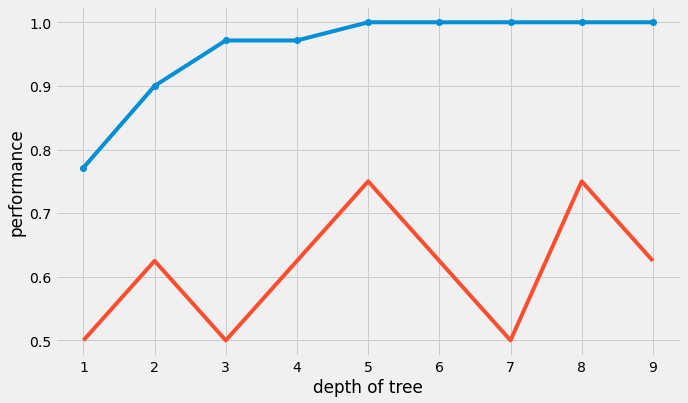

In [144]:
frame_1=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy_1,'test_acc':test_accuracy_1})
plt.figure(figsize=(10,6))
plt.plot(frame_1["max_depth"],frame_1["train_acc"],marker='o')
plt.plot(frame_1["max_depth"],frame_1["test_acc"])
plt.xlabel("depth of tree")
plt.ylabel("performance")

## Visualization of Confusion Matrix

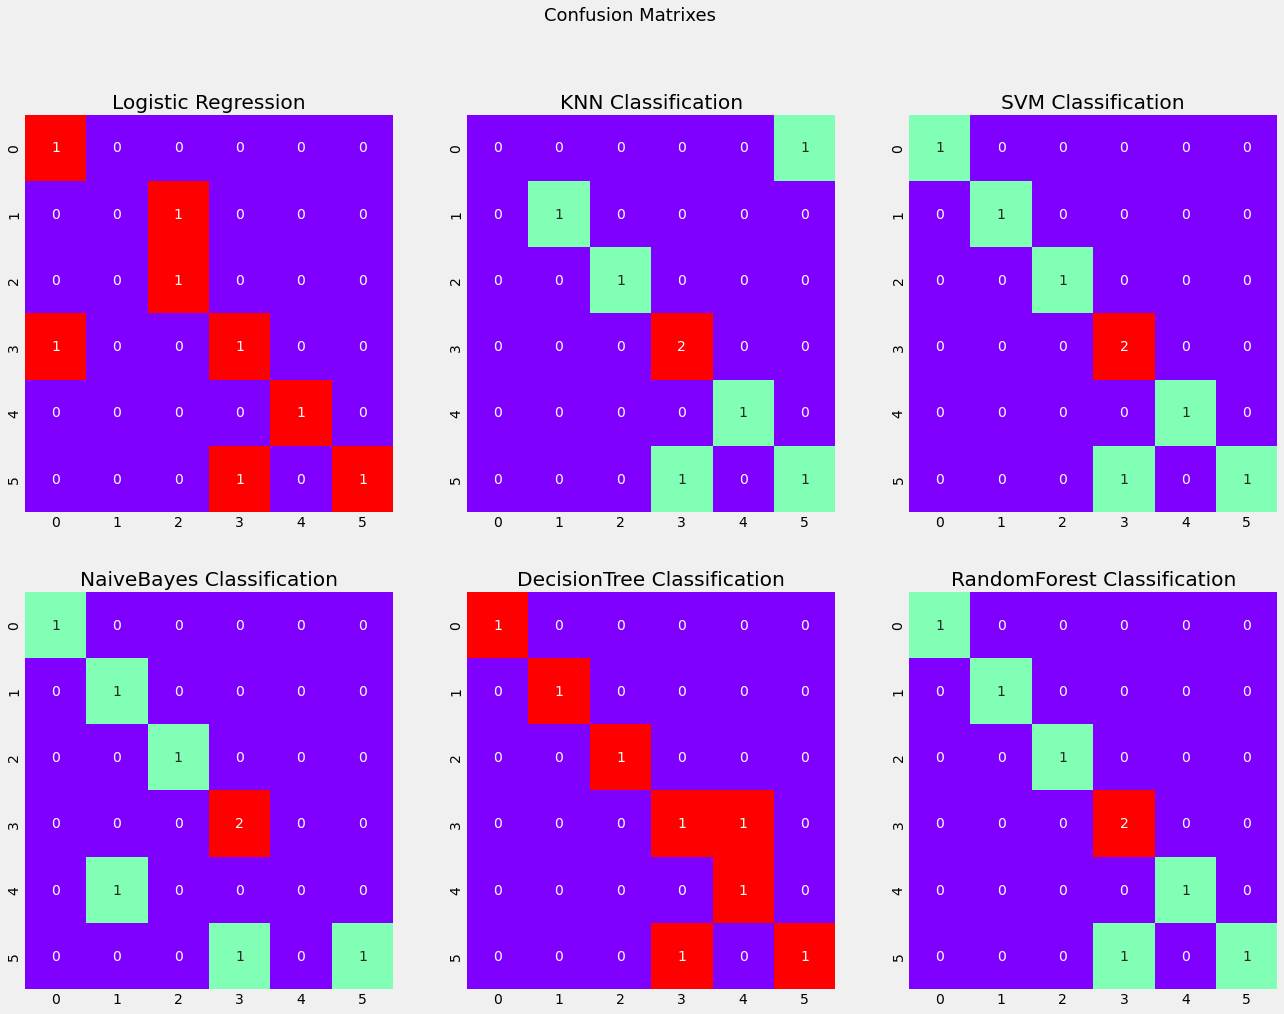

In [117]:
plt.figure(figsize=(20,15))

plt.suptitle("Confusion Matrixes", fontsize=18)

plt.subplot(2,3,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,2)
plt.title("KNN Classification")
sns.heatmap(knn_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,3)
plt.title("SVM Classification")
sns.heatmap(svm_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,4)
plt.title("NaiveBayes Classification")
sns.heatmap(nb_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,5)
plt.title("DecisionTree Classification")
sns.heatmap(dt_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.subplot(2,3,6)
plt.title("RandomForest Classification")
sns.heatmap(rf_cm, cbar=False, annot=True, cmap="rainbow", fmt="d")

plt.show()

In [118]:
TN = [lr_cm[0,0], knn_cm[0,0], svm_cm[0,0], nb_cm[0,0], dt_cm[0,0], rf_cm[0,0]]
FP = [lr_cm[0,1], knn_cm[0,1], svm_cm[0,1], nb_cm[0,1], dt_cm[0,1], rf_cm[0,1]]
FN = [lr_cm[1,0], knn_cm[1,0], svm_cm[1,0], nb_cm[1,0], dt_cm[1,0], rf_cm[1,0]]
TP = [lr_cm[1,1], knn_cm[1,1], svm_cm[1,1], nb_cm[1,1], dt_cm[1,1], rf_cm[1,1]]
Accuracy = [lr_score, knn_score, svm_score, nb_score, dt_score, rf_score]
#MSE = [lr_mse, knn_mse, svm_mse, nb_mse, dt_mse, rf_mse]
Classification = ["Logistic Regression", "KNN Classification", "SVM Classification", "Naive Bayes Classification", 
                  "Decision Tree Classification", "Random Forest Classification"]
list_matrix = [Classification, TN, FP, FN, TP, Accuracy]
list_headers = ["Model", "TN", "FP", "FN", "TP", "Accuracy"]
zipped = list(zip(list_headers, list_matrix))
data_dict = dict(zipped)
df_1=pd.DataFrame(data_dict)

In [119]:
df_1

,Model,TN,FP,FN,TP,Accuracy
0,Logistic Regression,1,0,0,0,0.625
1,KNN Classification,0,0,0,1,0.750
2,SVM Classification,1,0,0,1,0.875
3,Naive Bayes Classification,1,0,0,1,0.750
4,Decision Tree Classification,1,0,0,1,0.750
5,Random Forest Classification,1,0,0,1,0.875


In [120]:
trace1 = {
    'x':df_1.Model,
    'y':df_1.TN,
    'name':'True Negative',
    'type':'bar'}

trace2 = {
    'x':df_1.Model,
    'y':df_1.FP,
    'name':'False Positive',
    'type':'bar'}

trace3 = {
    'x':df_1.Model,
    'y':df_1.FN,
    'name':'False Negative',
    'type':'bar'}

trace4 = {
    'x':df_1.Model,
    'y':df_1.TP,
    'name':'True Positive',
    'type':'bar'}

graph = [trace1, trace2, trace3, trace4];
layout = {
  'xaxis': {'title': 'Classification Models'},
  'barmode': 'relative',
  'title': 'Confusion Matrix Values of Classification Models'
};
fig = go.Figure(data = graph, layout = layout)
iplot(fig)

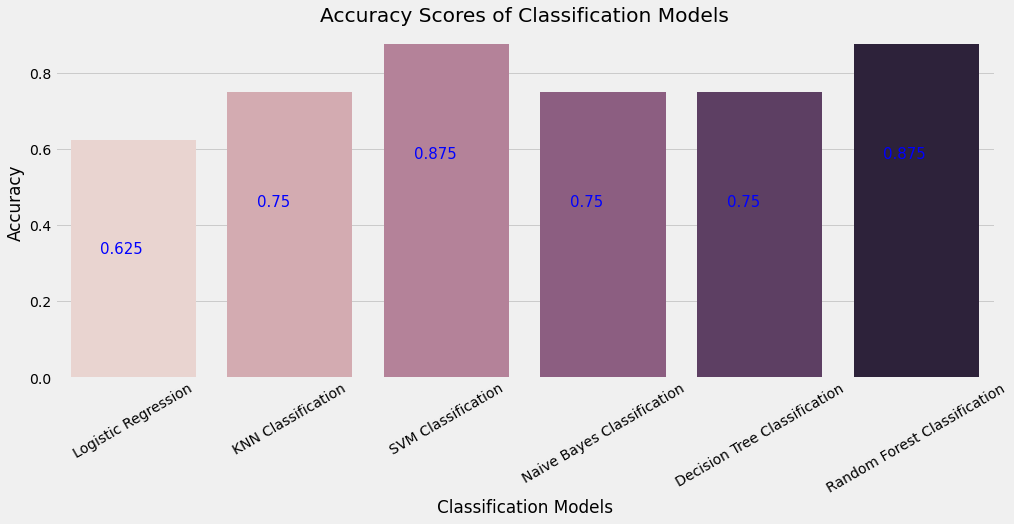

In [121]:
#Accuracy
plt.figure(figsize=(15,6))
ax= sns.barplot(x=df_1.Model, y=df_1.Accuracy, palette = sns.cubehelix_palette(len(df_1.Model)))
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Scores of Classification Models')
for i in ax.patches:
    ax.text(i.get_x()+.19, i.get_height()-0.3, \
            str(round((i.get_height()), 4)), fontsize=15, color='b')
plt.show()

In [122]:
d = {'y_test': y_test, 'Logistic_Regression_prediction': lr_prediction, 'KNN_prediction': knn_prediction, 
     'SVM_prediction': svm_prediction, 'Naive_Bayes_prediction': prediction, 'Decision_Tree_prediction': dt_prediction, 
     'Random_Forest_prediction': rf_prediction}
data1=pd.DataFrame(data=d)
data1.T

,0,1,2,3,4,5,6,7
y_test,7,6,5,7,1,5,0,3
Logistic_Regression_prediction,7,6,0,5,3,5,0,3
KNN_prediction,7,6,5,5,1,5,7,3
SVM_prediction,7,6,5,5,1,5,0,3
Naive_Bayes_prediction,7,1,5,5,1,5,0,3
Decision_Tree_prediction,7,6,5,5,1,6,0,3
Random_Forest_prediction,7,6,5,5,1,5,0,3


### Observation : Models Performed well

#### Random_Forest
#### Support Vector Machine

In [141]:
le_encoder.inverse_transform(data1["y_test"])

array(['sql', 'react', 'peoplesoft', 'sql', 'html', 'peoplesoft', 'eib',
       'javascript'], dtype=object)

In [124]:
data2=le_encoder.inverse_transform(data1["SVM_prediction"])
data2

array(['sql', 'react', 'peoplesoft', 'peoplesoft', 'html', 'peoplesoft',
       'eib', 'javascript'], dtype=object)

In [140]:
le_encoder.inverse_transform(data1["Random_Forest_prediction"])

array(['sql', 'react', 'peoplesoft', 'peoplesoft', 'html', 'peoplesoft',
       'eib', 'javascript'], dtype=object)